In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as pgo
from sklearn import cluster
import pandas as pd
from sklearn.decomposition import IncrementalPCA

In [3]:
history = pd.read_csv('user_history.csv')
history.shape

(4500, 101)

In [4]:
history.describe()

,USER ID,nectar prague,joshua sleep,gallery fiesta,jerome jazz,motif polo,zigzag germany,susan sonar,alamo group,gilbert chicken,...,pandora oval,cabinet state,cecilia raja,memo darwin,enigma recycle,olivia image,world blonde,begin unit,rodeo santana,drum spring
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,...,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,113376.351778,1.865722,1.638220,1.143836,0.985400,1.216889,2.272874,2.374980,1.043467,1.578136,...,1.627423,1.036980,1.841324,1.875481,1.132869,2.113052,1.509319,0.700393,0.824720,0.686132
std,7184.873215,0.937386,1.301395,0.743591,0.712322,0.794407,2.134627,1.677591,0.717391,1.324045,...,1.128374,0.873155,1.144434,1.312701,0.697700,0.483498,0.805120,0.410686,0.502802,0.537353
min,100953.000000,0.000558,0.000111,0.000072,0.000407,0.000103,0.000347,0.000068,0.000327,0.000288,...,0.001380,0.000017,0.000060,0.000289,0.000358,0.411463,0.000562,0.000098,0.000784,0.000001
25%,107134.000000,1.096461,0.481934,0.466599,0.377794,0.562622,0.399109,0.806781,0.461352,0.504135,...,0.665749,0.280598,0.785005,0.418055,0.563602,1.787143,0.618802,0.328835,0.406434,0.249143
50%,113286.000000,1.956605,1.250749,1.101720,0.850522,1.107225,1.335345,2.102481,0.932965,1.002327,...,1.408540,0.706805,1.890321,1.934150,1.065851,2.116222,1.839018,0.734343,0.803667,0.548355
75%,119607.250000,2.587191,3.002011,1.780516,1.498610,1.811398,4.952487,4.044239,1.533543,2.959773,...,2.528821,2.012495,2.770093,3.163269,1.650293,2.443463,2.138760,1.017411,1.198217,1.049258
max,125976.000000,4.521661,5.153343,3.125105,3.748970,4.089940,6.759219,6.565286,3.897725,5.177968,...,5.339951,3.002520,5.688518,4.505662,3.267691,3.696181,2.965128,1.895920,2.674754,2.818771


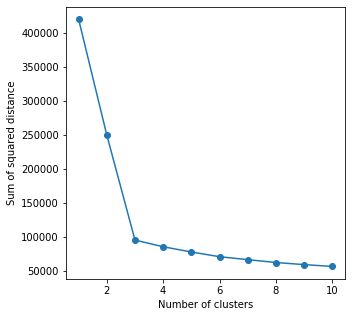

In [5]:
# elbow method
sse = []
list_k = list(range(1, 11))

for k in list_k:
    km = cluster.KMeans(n_clusters=k)
    km.fit(history.drop(['USER ID'], axis=1)) # we need to drop the first column(user id)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(5, 5))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance')
plt.show()

In [6]:
# According to elbow method, the best k should be 3
kmeans = cluster.KMeans(3) 
kmeans.fit(history.drop(['USER ID'], axis=1))
kmeans_y = kmeans.predict(history.drop(['USER ID'], axis=1))

In [7]:
# Seperate first 3000 users by their labels
# Create three arrays for each cluster/group of users
First_Group = []
Second_Group = []
Third_Group = []

for i in range(3000): 
    if kmeans.labels_[i] == 0:
        First_Group.append(history['USER ID'].iloc[i])
    if kmeans.labels_[i] == 1:
        Second_Group.append(history['USER ID'].iloc[i])
    if kmeans.labels_[i] == 2:
        Third_Group.append(history['USER ID'].iloc[i])
        
First_Group = np.asarray(First_Group)
Second_Group = np.asarray(Second_Group)
Third_Group = np.asarray(Third_Group)

In [8]:
print(First_Group)

[100965 100993 101016 101034 101049 101056 101062 101072 101090 101127
 101133 101156 101179 101218 101227 101235 101237 101266 101297 101301
 101303 101313 101335 101337 101363 101373 101377 101404 101467 101491
 101509 101526 101536 101545 101589 101610 101644 101675 101695 101700
 101708 101771 101792 101836 101850 101853 101859 101890 101930 101933
 101934 101938 101948 101984 102003 102025 102055 102061 102072 102100
 102108 102153 102155 102201 102229 102245 102253 102259 102282 102288
 102297 102307 102320 102381 102390 102401 102419 102424 102425 102442
 102474 102509 102516 102533 102538 102545 102659 102678 102694 102708
 102718 102721 102763 102774 102783 102828 102879 102886 102902 102930
 102942 102957 102967 102982 103002 103032 103071 103088 103107 103120
 103135 103199 103209 103223 103224 103282 103301 103347 103349 103352
 103407 103432 103433 103437 103445 103466 103470 103486 103502 103517
 103527 103534 103543 103577 103589 103626 103641 103656 103674 103683
 10371

In [9]:
len(First_Group)

983

In [10]:
len(Second_Group)

1009

In [11]:
len(Third_Group)

1008

In [12]:

#--------------------PART2---------------------------



In [13]:
reformat = pd.read_csv('user_data.csv')
reformat.shape

(3000, 101)

In [14]:
ratings = pd.read_csv('user_ratings.csv')
ratings.shape
#history.head

(150062, 3)

In [15]:
from sklearn.model_selection import train_test_split

#According to 3 clusterings, split each USER_ID array into train/test arrays
First_Group_train, First_Group_test = train_test_split(First_Group, test_size=0.2)
Second_Group_train, Second_Group_test = train_test_split(Second_Group, test_size=0.2)
Third_Group_train, Third_Group_test = train_test_split(Third_Group, test_size=0.2)

#Sort again those arrays in ascending order
First_Group_train.sort()
First_Group_test.sort()
Second_Group_train.sort()
Second_Group_test.sort()
Third_Group_train.sort()
Third_Group_test.sort()


In [16]:
#Generate Three Dataframes corresponding to train/test arrays
Clstr1_train = reformat[reformat['USER_ID'].isin(First_Group_train)]
Clstr1_test = reformat[reformat['USER_ID'].isin(First_Group_test)]
Clstr2_train = reformat[reformat['USER_ID'].isin(Second_Group_train)]
Clstr2_test = reformat[reformat['USER_ID'].isin(Second_Group_test)]
Clstr3_train = reformat[reformat['USER_ID'].isin(Third_Group_train)]
Clstr3_test = reformat[reformat['USER_ID'].isin(Third_Group_test)]

#print(Clstr3_test)

#print(Third_Group_train)
#len(Third_Group_train)
#type(Third_Group_train)

In [17]:
##Since the target products in each dataframes are the same: exacly as those 100 products,
##So we store those products into a list
target_products = list(reformat.columns) 
target_products.remove(target_products[0]) #remove the item 'USER_ID'
target_products = np.asarray(target_products)

#type(target_products)
#print(target_products)
#len(target_products)
##After rechecking, we know that array is what we need.


In [23]:
def load_rating_clusters(dataframe):
    users = []
    products = []
    ratings = []
    temp1 = dataframe.iloc[:,1:101]
    temp2 = np.array(temp1)
    rownumber = len(temp2)
    colnumber = temp2.shape[1]
    #Get ndArray of all column names 
    columnNames = list(dataframe.columns) 
    columnNames.remove(columnNames[0]) #remove the item 'USER_ID'
    columnNames = np.asarray(columnNames)
    #Get ndArray of all column names 
    rowNames = dataframe.iloc[:, 0]
    rowNames = np.array(rowNames)
    
    for i in range(rownumber): 
        for j in range(colnumber):
            users.append(rowNames[i])
            products.append(columnNames[j])
            ratings.append(temp2[i,j])
    #reformat3_ratings = np.array(reformat3_ratings)
    users = np.array(users)
    products = np.array(products)
    ratings = np.array(ratings)
    return users,products,ratings

users1_train,products1_train,ratings1_train = load_rating_clusters(Clstr1_train)
users1_test,products1_test,ratings1_test = load_rating_clusters(Clstr1_test)
users2_train,products2_train,ratings2_train = load_rating_clusters(Clstr2_train)
users2_test,products2_test,ratings2_test = load_rating_clusters(Clstr2_test)
users3_train,products3_train,ratings3_train = load_rating_clusters(Clstr3_train)
users3_test,products3_test,ratings3_test = load_rating_clusters(Clstr3_test)

In [28]:
for i in range (len(users1_train)):
    G1user_train = 

[100965 100965 100965 ... 117512 117512 117512] 78600


In [32]:
##BYJW3
train_ratings = ratings1_train

learning_rate = 0.005
k = 10 # the number of features (for each user/movie)
m = len(train_ratings) # the size of the training set
n_users = len(First_Group)
n_movies = 100

train_users = users1_train
train_movies = products1_train

def initialize(n_users, n_movies, k):
    """Initalize a random model, and normalize it so that it has sensible mean and variance"""
    # (The normalization helps make sure we start out at a reasonable parameter scale, which speeds up training)
    user_features = np.random.normal(size=(n_users, k))
    movie_features = np.random.normal(size=(n_movies, k))
    raw_predictions = predict((user_features, movie_features))
    
    s = np.sqrt(2*raw_predictions.std()) # We want to start out with roughly unit variance
    b = np.sqrt((3.5 - raw_predictions.mean()/s)/k) #We want to start out with average rating 3.5
    user_features /= s
    user_features += b
    movie_features /= s
    movie_features += b
    
    return (user_features, movie_features)

def predict(model):
    """The model's predictions for all user/movie pairs"""
    user_features, movie_features = model
    return user_features @ movie_features.T

def single_example_step(model, user, movie, rating):
    """Update the model using the gradient at a single training example"""
    user_features, movie_features = model
    residual = np.dot(user_features[user], movie_features[movie]) - rating
    grad_users = 2 * residual * movie_features[movie] # the gradient for the user_features matrix
    grad_movies = 2 * residual * user_features[user] # the gradient for the movie_features matrix
    user_features[user] -= learning_rate*grad_users
    movie_features[movie] -= learning_rate*grad_movies

def train_sgd(model, epochs):
    """Train the model for a number of epochs via SGD (batch size=1)"""
    user_features, movie_features = model
    # It's good practice to shuffle your data before doing batch gradient descent,
    # so that each mini-batch peforms like a random sample from the dataset
    shuffle = np.random.permutation(m) 
    shuffled_users = train_users[shuffle]
    shuffled_movies = train_movies[shuffle]
    shuffled_ratings = train_ratings[shuffle]
    #print(train_users,len(shuffle))
    #print(type(train_users),type(shuffle))
    #print(shuffle, len(shuffle))
    #print(shuffled_ratings, len(shuffled_ratings))
    for epoch in range(epochs):
        for user, movie, rating in zip(shuffled_users, shuffled_movies, shuffled_ratings):
            # update the model using the gradient at a single example
            single_example_step(model, user, movie, rating)
        # after each Epoch, we'll evaluate our model
        predicted = predict(model)
        train_loss = np.mean((train_ratings - predicted[train_users, train_movies])**2)
        test_loss = np.mean((test_ratings - predicted[test_users, test_movies])**2)
        print("Loss after epoch #{} is: train/{} --- test/{}".format(epoch+1, train_loss, test_loss))
    
sgd_model = initialize(n_users, n_movies, k)
train_sgd(sgd_model, 10)

IndexError: index 105662 is out of bounds for axis 0 with size 983

In [31]:
learning_rate = 0.005

def initialize(n_users, n_products):
    """Initalize a random model, and normalize it so that it has sensible mean and variance"""
    # (The normalization helps make sure we start out at a reasonable parameter scale, which speeds up training)
    user_features = np.random.normal(size=(n_users,10)) # still setting the number of features as 10
    product_features = np.random.normal(size=(n_products,10)) # still setting the number of features as 10
    raw_predictions = predict((user_features, product_features))
    
    s = np.sqrt(2*raw_predictions.std()) # We want to start out with roughly unit variance
    b = np.sqrt(5 - raw_predictions.mean()/s) #We want to start out with average rating 5
    user_features /= s
    user_features += b
    product_features /= s
    product_features += b
    
    return (user_features, product_features)

def predict(model):
    """The model's predictions for all user/product pairs"""
    user_features, product_features = model
    return user_features @ product_features.T

sgd_model_1 = initialize(len(First_Group), len(target_products))


In [19]:

def single_example_step(model, user, product, rating, train_users, train_products):
    """Update the model using the gradient at a single training example"""
    user_features, product_features = model
    residual = np.dot(user_features[np.argwhere(train_users==user)], product_features[np.argwhere(train_products==product)]) #- rating
    for i in range(len(residual)):
        residual[i]-=rating[i]
    grad_users = 2 * residual * product_features[np.argwhere(train_products==product)] # the gradient for the user_features matrix
    grad_products = 2 * residual * user_features[np.argwhere(train_users==user)] # the gradient for the product_features matrix
    #print(grad_users.shape,grad_products.shape)
    user_features[np.argwhere(train_users==user)] -= learning_rate*grad_users
    product_features[np.argwhere(train_products==product)] -= learning_rate*grad_products

def train_sgd(model, epochs, train_users, train_products, train_ratings, test_users, test_products, test_ratings):
    """Train the model for a number of epochs via SGD (batch size=1)"""
    user_features, movie_features = model
    # It's good practice to shuffle your data before doing batch gradient descent,
    # so that each mini-batch peforms like a random sample from the dataset
    shuffle = np.random.permutation(len(train_ratings))
    print(len(shuffle), len(train_users))
    """
    shuffled_users = train_users[shuffle]
    shuffled_products = train_products[shuffle]
    shuffled_ratings = train_ratings[shuffle]
    for epoch in range(epochs):
        for user, product, rating in zip(shuffled_users, shuffled_products, shuffled_ratings):
            # update the model using the gradient at a single example
            single_example_step(model, user, product, rating, train_users, train_products)
        # after each Epoch, we'll evaluate our model
        
        predicted = predict(model)
        train_loss = np.mean((train_ratings - predicted[train_users, train_products])**2)
        test_loss = np.mean((test_ratings - predicted[test_users, test_products])**2)
        print("Loss after epoch #{} is: train/{} --- test/{}".format(epoch+1, train_loss, test_loss))
     """


In [ ]:
sgd_model_1 = initialize(len(users1_train), len(products1_train))
#train_sgd(sgd_model_1, 10, users1_train, products1_train, ratings1_train, users1_test, products1_test, ratings1_test)
#sgd_model_2 = initialize(len(users2_train), len(products2_train))
#train_sgd(sgd_model_2, 10, users2_train, products2_train, ratings2_train, users2_test, products2_test, ratings2_test)
#sgd_model_3 = initialize(len(users3_train), len(products3_train))
#train_sgd(sgd_model_3, 10, users3_train, products3_train, ratings3_train, users3_test, products3_test, ratings3_test)





In [73]:
 def all_examples_step(model, train_users, train_products, train_ratings):
    """Update the model using the gradient averaged over all training examples"""
    user_features, product_features = model
    # To average the gradient over all training examples, it's convenient to
    #    initialize arrays of zeros to hold the full gradients, and then update
    #    these arrays at each training example, just like in the SGD procedure
    grad_users = np.zeros_like(user_features)
    grad_products = np.zeros_like(product_features)
    # We only need to compute the model's predicted ratings once
    predicted = predict(model)
    for user, product, rating in zip(train_users, train_products, train_ratings):
        # Mimic the SGD procedure, but store the gradients so they can be averaged
        residual = predicted[np.argwhere(train_users==user), np.argwhere(train_products==product)] - rating
        #for i in range(len(residual)):
        #   residual[i]-=rating[i]
        #print(grad_users.shape,grad_products.shape)
        
        grad_users[np.argwhere(train_users==user)] += 2 * residual * product_features[np.argwhere(train_products==product)]
        grad_products[np.argwhere(train_products==product)] += 2 * residual * user_features[np.argwhere(train_users==user)]
        
    user_features -= learning_rate/(len(train_ratings)) * grad_users # Update using the averaged gradients
    product_features -= learning_rate/(len(train_ratings)) * grad_products
    

    
def train_full(model, epochs, train_users, train_products, train_ratings):
    """Train the model for a number of epochs using gradients estimated from the entire training set"""
    user_features, product_features = model
    for epoch in range(epochs):
        all_examples_step(model, train_users, train_products, train_ratings)
        predicted = predict(model)
        train_loss = np.mean((train_ratings - predicted[train_users, train_products])**2)
        test_loss = np.mean((test_ratings - predicted[test_users, test_products])**2)
        print("Loss after epoch #{} is: train/{} --- test/{}".format(epoch+1, train_loss, test_loss))
        
full_model_1 = initialize(len(First_Group), len(p1_train))
learning_rate = 8. # Since we are averaging very sparse gradients,
# the gradients will be small and we can use a large learning rate
train_full(full_model_1, 100, First_Group, p1_train, r1_train) # We only get a single update to the model from each epoch, so we'll need a lot more epochs
full_model_2 = initialize(len(Second_Group), len(p2_train))
learning_rate = 8. # Since we are averaging very sparse gradients,
# the gradients will be small and we can use a large learning rate
train_full(full_model_2, 100, Second_Group, p2_train, r2_train) # We only get a single update to the model from each epoch, so we'll need a lot more epochs
full_model_3 = initialize(len(Third_Group), len(p3_train))
learning_rate = 8. # Since we are averaging very sparse gradients,
# the gradients will be small and we can use a large learning rate
train_full(full_model_3, 100, Third_Group, p3_train, r3_train) # We only get a single update to the model from each epoch, so we'll need a lot more epochs

(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (

(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (

IndexError: arrays used as indices must be of integer (or boolean) type

##size preparations for training
m1_train = len(ratings1_train) # the size of the training set of 1st clustering 
n1_users_train = max(First_Group_train)+1 # the largest index, plus 1
n_products = len(target_products)+1  #since we need to computer max(train_movies)+1 

##temprary we set:
learning_rate = 0.005
k = 10

def predict(model):
    """The model's predictions for all user/movie pairs"""
    user_features, movie_features = model
    return user_features @ movie_features.T

##define initializae function
def initialize(n_users, n_movies, k):
    """Initalize a random model, and normalize it so that it has sensible mean and variance"""
    # (The normalization helps make sure we start out at a reasonable parameter scale, which speeds up training)
    user_features = np.random.normal(size=(n_users, k))
    movie_features = np.random.normal(size=(n_movies, k))
    raw_predictions = predict((user_features, movie_features))
    
    s = np.sqrt(2*raw_predictions.std()) # We want to start out with roughly unit variance
    b = np.sqrt((3.5 - raw_predictions.mean()/s)/k) #We want to start out with average rating 3.5
    user_features /= s
    user_features += b
    movie_features /= s
    movie_features += b
    
    return (user_features, movie_features)

sgd_model_Group1_train = initialize(n1_users_train, n_products, k)
#(sgd_model_Group1_train)

def single_example_step(model, user, movie, rating):
    """Update the model using the gradient at a single training example"""
    user_features, movie_features = model
    residual = np.dot(user_features[user], movie_features[movie]) - rating
    grad_users = 2 * residual * movie_features[movie] # the gradient for the user_features matrix
    grad_movies = 2 * residual * user_features[user] # the gradient for the movie_features matrix
    user_features[user] -= learning_rate*grad_users
    movie_features[movie] -= learning_rate*grad_movies

def train_sgd(model, epochs):
    """Train the model for a number of epochs via SGD (batch size=1)"""
    user_features, movie_features = model
    # It's good practice to shuffle your data before doing batch gradient descent,
    # so that each mini-batch peforms like a random sample from the dataset
    shuffle = np.random.permutation(m1_train)     ##!!!notice the vari
    shuffled_users = train_users[shuffle]
    shuffled_movies = train_movies[shuffle]
    shuffled_ratings = train_ratings[shuffle]
    for epoch in range(epochs):
        for user, movie, rating in zip(shuffled_users, shuffled_movies, shuffled_ratings):
            # update the model using the gradient at a single example
            single_example_step(model, user, movie, rating)
        # after each Epoch, we'll evaluate our model
        predicted = predict(model)
        train_loss = np.mean((train_ratings - predicted[train_users, train_movies])**2)
        test_loss = np.mean((test_ratings - predicted[test_users, test_movies])**2)
        print("Loss after epoch #{} is: train/{} --- test/{}".format(epoch+1, train_loss, test_loss))

train_sgd(sgd_model_Group1_train, 10)

learning_rate = 0.005
#k = 10 # the number of features (for each user/movie)
m = len(ratings1_train) # the size of the training set
n_users = max(First_Group_train)+1 # the largest index, plus 1
n_movies = max(train_movies)+1

def initialize(n_users, n_movies, k):
    """Initalize a random model, and normalize it so that it has sensible mean and variance"""
    # (The normalization helps make sure we start out at a reasonable parameter scale, which speeds up training)
    user_features = np.random.normal(size=(n_users, k))
    movie_features = np.random.normal(size=(n_movies, k))
    raw_predictions = predict((user_features, movie_features))
    
    s = np.sqrt(2*raw_predictions.std()) # We want to start out with roughly unit variance
    b = np.sqrt((3.5 - raw_predictions.mean()/s)/k) #We want to start out with average rating 3.5
    user_features /= s
    user_features += b
    movie_features /= s
    movie_features += b
    
    return (user_features, movie_features)

def predict(model):
    """The model's predictions for all user/movie pairs"""
    user_features, movie_features = model
    return user_features @ movie_features.T

def single_example_step(model, user, movie, rating):
    """Update the model using the gradient at a single training example"""
    user_features, movie_features = model
    residual = np.dot(user_features[user], movie_features[movie]) - rating
    grad_users = 2 * residual * movie_features[movie] # the gradient for the user_features matrix
    grad_movies = 2 * residual * user_features[user] # the gradient for the movie_features matrix
    user_features[user] -= learning_rate*grad_users
    movie_features[movie] -= learning_rate*grad_movies

def train_sgd(model, epochs):
    """Train the model for a number of epochs via SGD (batch size=1)"""
    user_features, movie_features = model
    # It's good practice to shuffle your data before doing batch gradient descent,
    # so that each mini-batch peforms like a random sample from the dataset
    shuffle = np.random.permutation(m) 
    shuffled_users = train_users[shuffle]
    shuffled_movies = train_movies[shuffle]
    shuffled_ratings = train_ratings[shuffle]
    for epoch in range(epochs):
        for user, movie, rating in zip(shuffled_users, shuffled_movies, shuffled_ratings):
            # update the model using the gradient at a single example
            single_example_step(model, user, movie, rating)
        # after each Epoch, we'll evaluate our model
        predicted = predict(model)
        train_loss = np.mean((train_ratings - predicted[train_users, train_movies])**2)
        test_loss = np.mean((test_ratings - predicted[test_users, test_movies])**2)
        print("Loss after epoch #{} is: train/{} --- test/{}".format(epoch+1, train_loss, test_loss))

sgd_model = initialize(n_users, n_movies, k)
train_sgd(sgd_model, 10)